# Statistical Rethinking: Chapter 5 Practice Answers

We use some of the code from [the pymc-devs Python/pymc3 port of the Statistical Rethinking code examples](https://github.com/pymc-devs/resources/blob/master/Rethinking_2/).

### 5E1

(2) and (4). (3) is not because there is only one slope variable, $\beta$. In the case of (2) the value of $\alpha$ is just zero.

### 5E2

Since multiple regression gives you the relationship between one predictor and another once we conditional on other predictors, it serves as a natural way to control for variables. As a result, we can just define a model with latitude and plant diversity predictors. I'm unsure how to define priors for $\alpha$ because I'm not sure how animal or plant diversity is measured and what the bounds are. The $\beta$ variables would be normally distributed since in principle there could be a negative correlation, and in fact my limited knowledge of ecology would say that the closer latitude is to zero the more plant diversity there would be.

$$ A_i \sim \text{Normal}(\mu, \sigma)$$
$$ \mu = \alpha + \beta_L L_i + \beta_P P_i$$
$$ \alpha \sim ? $$
$$ \beta_L \sim \text{Normal}(?, ?)$$
$$ \beta_P \sim \text{Normal}(?, ?)$$
$$ \sigma \sim \text{Exponential}(1)$$


### 5E3

To answer this question, we need 3 models. Two models are linear regression using just one predictor variable (funding or size of laboratory). The third model is the multiple regression model that uses both of those variables as predictors. I'll leave out the priors in the definitions. If the variables are positively associated, then the slope parameters will be positive.

#### Model 1
$$ T_i \sim \text{Normal}(\mu, \sigma)$$
$$ \mu = \alpha + \beta_F F_i $$

#### Model 2
$$ T_i \sim \text{Normal}(\mu, \sigma)$$
$$ \mu = \alpha + \beta_L L_i $$

#### Model 3
$$ T_i \sim \text{Normal}(\mu, \sigma)$$
$$ \mu = \alpha +  \beta_F F_i + \beta_L L_i $$

### 5E4

**I'm unsure about this**. (4) and (5) are definitely equivalent, but I'm not sure about the _inferential equivalence_ of the other models.

### 5M1

This spurious correlation would occur when one of the predictors tells you a lot about the other one. For example, your height might be a predictor of how many points you score per game in basketball. Dollars earnt from basketball might also be a predictor of the amount of points you score per game. The idea would be that once you use dollars earnt and height as predictors together, the correlation between outcome and one of the predictors should vanish. Let's imagine that negative points means conceding points.

In [1]:
import scipy.stats as stats

In [2]:
# Number of examples
N = 50
height = stats.norm.rvs(185, 20, size=N)

In [3]:
height

array([217.70370906, 176.62474253, 135.48839208, 204.33018221,
       221.2555992 , 192.73927388, 174.12544474, 186.39726947,
       176.37460251, 201.62819558, 175.0154484 , 194.84015413,
       189.30342283, 154.63882221, 210.05528764, 158.86074527,
       171.47967362, 155.53749026, 213.99510896, 179.42324713,
       168.75907485, 168.02791729, 221.87242679, 193.84679686,
       171.35573273, 166.42480703, 195.54374488, 164.44516731,
       140.24767869, 193.96779659, 164.04046969, 189.8870312 ,
       195.20294169, 165.55226134, 196.28057687, 203.89512562,
       201.50696961, 220.71966871, 165.54022251, 186.40398498,
       177.21034541, 203.59587076, 151.13211769, 161.9524153 ,
       165.19785122, 132.13229663, 185.22403884, 168.4897427 ,
       202.53181223, 141.45099719])

In [4]:
points = (height - height.mean())*0.5 + stats.norm.rvs(30, 4, size=N)

In [5]:
points

array([50.98368289, 30.14347858, 18.17825031, 41.86679753, 46.98424037,
       32.25986993, 20.5750566 , 27.47423342, 28.40703385, 41.41355882,
       34.39020317, 39.13316614, 36.54248156, 25.93125218, 38.40182353,
       13.3540376 , 28.6895941 , 10.62231361, 47.40030282, 28.08898817,
       27.60646253, 26.04813835, 48.47460193, 38.53430646, 29.91146428,
       30.12401774, 39.5892765 , 21.38121706, 11.47651907, 37.60164008,
       23.665808  , 40.66219594, 45.2138738 , 23.21787652, 41.4237737 ,
       36.91235783, 37.64458071, 50.00325272, 26.4958737 , 34.7052263 ,
       27.96821668, 37.99137941, 15.46501284, 16.92681691, 19.16976979,
        1.35238123, 37.6474833 , 24.23198908, 33.98225995, 17.88808647])

In [6]:
dollars = (points - points.mean())*2000 + stats.norm.rvs(150000, 30000, size=N)

In [7]:
dollars

array([251706.91468057, 171783.65971325, 106156.59966768, 183491.65137273,
       169012.37074299, 192148.93858638,  97453.00293163, 153819.90165495,
       156608.0653772 , 149728.45852434, 144763.8884134 , 206383.79440544,
       163765.72884044,  75136.39605974, 187341.05891388,  77759.12194905,
       154255.94268634,  50125.56390801, 179451.1305269 , 108481.11197453,
       153729.99324746,  85335.12083463, 190052.33208607,  93042.13744746,
       123587.6808668 , 133570.6119705 , 176300.69536791, 135149.51393847,
       108905.45562505, 173697.32608022, 159114.92528045, 157367.06658104,
       188405.86898049,  94843.8795158 ,  94666.16959798, 175820.24743537,
       147365.72331752, 143556.87772374, 132468.48992668, 151884.11053819,
       170479.32934139, 128916.58238489, 112649.33112641, 117827.63623242,
       100802.6706479 , 105239.47890317, 154645.20691575, 129758.21943312,
       157983.49600463, 167387.79734218])

In [8]:
import pymc3 as pm

In [9]:
height_std = (height - height.mean()) / height.std()
points_std = (points - points.mean()) / points.std()
dollars_std = (dollars - dollars.mean()) / dollars.std()

Now let's define some models and do inference. First let's predict dollars earnt based off of points.

In [10]:
with pm.Model() as m1:
    sigma = pm.Lognormal('sigma', mu=1, sd=2)
    alpha = pm.Normal('alpha', mu=0, sd=1)
    beta = pm.Normal('beta', mu=0, sd=1)
    mu = alpha + beta*(points_std - points_std.mean())
    dollars_preds = pm.Normal('dollars', mu=mu, sd=sigma, observed=dollars_std)

In [11]:
def plot_predictive(prior_check):
    _, ax = plt.subplots()

    x = np.linspace(-2.5, 2.5, 50)

    for a, b in zip(prior_check["alpha"], prior_check["beta"]):
        y = a + b * x
        ax.plot(x, y, c="k", alpha=0.4)

    ax.set_xlabel("Predictor")
    ax.set_ylabel("Mean Outcome")

In [12]:
with m1:
    prior_check = pm.sample_prior_predictive()

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
with m1:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


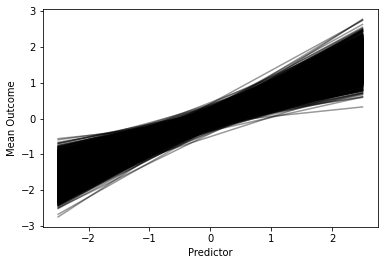

In [15]:
plot_predictive(trace)

Now let's predict dollars earnt based off of height

In [16]:
with pm.Model() as m1:
    sigma = pm.Lognormal('sigma', mu=1, sd=2)
    alpha = pm.Normal('alpha', mu=0, sd=1)
    beta = pm.Normal('beta', mu=0, sd=1)
    mu = alpha + beta*(height_std)
    dollars_preds = pm.Normal('dollars', mu=mu, sd=sigma, observed=dollars_std)

In [17]:
with m1:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


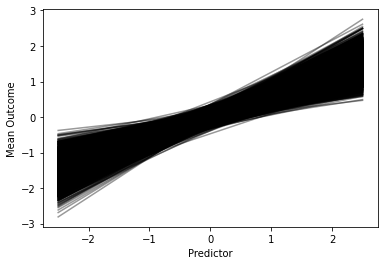

In [18]:
plot_predictive(trace)

Now let's define some models and do inference. Now let's predict dollars earnt based off of height and points

In [19]:
with pm.Model() as m1:
    sigma = pm.Lognormal('sigma', mu=1, sd=2)
    alpha = pm.Normal('alpha', mu=0, sd=1)
    beta = pm.Normal('beta', mu=0, sd=1)
    beta_2 = pm.Normal('beta_2', mu=0, sd=1)
    mu = alpha + beta*(height_std) + beta_2*(points_std)
    dollars_preds = pm.Normal('dollars', mu=mu, sd=sigma, observed=dollars_std)

In [20]:
with m1:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_2, beta, alpha, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


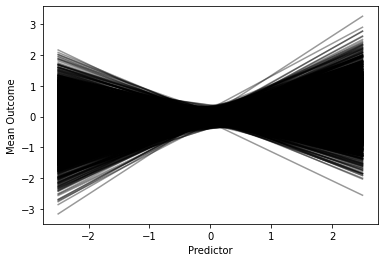

In [21]:
plot_predictive(trace)

Adapt plots to use the second beta coefficient, corresponding to points scored.

In [22]:
def plot_predictive(prior_check):
    _, ax = plt.subplots()

    x = np.linspace(-2.5, 2.5, 50)

    for a, b in zip(prior_check["alpha"], prior_check["beta_2"]):
        y = a + b * x
        ax.plot(x, y, c="k", alpha=0.4)

    ax.set_xlabel("Predictor")
    ax.set_ylabel("Mean Outcome")

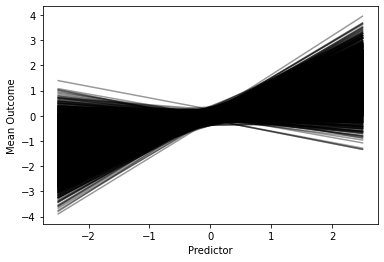

In [23]:
plot_predictive(trace)

Note how the ranges for valid posteriors are much wider in the multiple regression, and even account for negative relationships between predictors and outcomes, when the singe-predictor linear regression was far less equivocal.

### 5M2

As an example of a masked relationship, we will do multiple regression to predict climbing grades. The predictor variables will be finger strength and weight. Finger strength is positively associated with the grade someone can climb. Weight is negatively associated. But finger strength is positively associated with weight.

What we expect is that there will be an unclear bivariate relationship between finger strength and climbing grade, but when multiple regression is used, the coefficient for finger strength will become very positive.

I Found an [actual small dataset](https://static1.squarespace.com/static/56830ef60ab377cb562da204/t/5f99cebdafb139471fbafd67/1603915468772/BF_strength_climbing_correlations-MAR282018web.pdf) on this! Sure enough, the statistical experiment bore it out.


In [26]:
weight = np.array([135, 141, 127, 120, 133, 161, 160, 138, 127, 107, 146, 128, 147, 110, 133, 156, 136, 131, 168, 109, 143, 177, 140, 107])
bouldering = np.array([10, 10, 6, 5, 7, 8, 5, 6, 7, 8, 5, 13, 13, 5, 9, 8, 9, 6, 4, 8, 7, 3, 10, 3])
# strength to weight ratio of the left hand
hand_l_ratio = np.array([81.48, 92.2, 62.99, 54.17, 71.43, 71.43, 53.75, 47.1, 70.87, 80.37, 46.58, 100, 102.04, 54.55, 82.71, 72.44, 88.24, 68.7, 57.14, 80.73, 61.05, 77.97, 90.71, 46.73])

In [28]:
assert len(weight) == len(bouldering)
assert len(hand_l_ratio) == len(bouldering)

In [29]:
# Raw strength of left hand
hand_l = (hand_l_ratio / 100)*weight

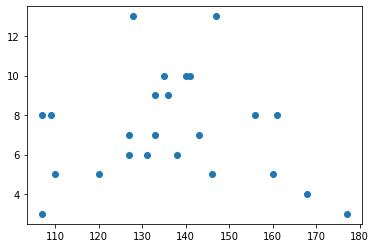

In [30]:
plt.scatter(weight, bouldering)

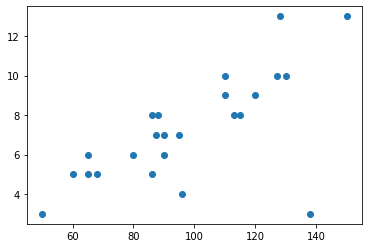

In [31]:
plt.scatter(hand_l, bouldering)

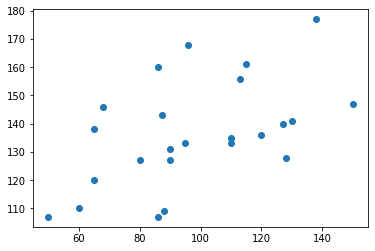

In [32]:
plt.scatter(hand_l, weight)

In [33]:
weight_std = (weight - weight.mean()) / weight.std()
hand_l_std = (hand_l - hand_l.mean()) / hand_l.std()
bouldering_std = (bouldering - bouldering.mean()) / bouldering.std()

In [34]:
with pm.Model() as m:
    a = pm.Normal('a', 0, 0.2)
    bS = pm.Normal('bS', 0, 0.5)
    bW = pm.Normal('bW', 0, 0.5)
    sigma = pm.Exponential('sigma', 1)
    mu = a + bS * hand_l_std + bW * weight_std
    grade = pm.Normal('grade', mu, sigma, observed=bouldering_std)

In [35]:
with m:
    prior_check = pm.sample_prior_predictive(samples=50)

In [36]:
def plot_predictive(prior_check, a_key='a', b_key='b'):
    _, ax = plt.subplots()

    x = np.linspace(-2.5, 2.5, 50)

    for a, b in zip(prior_check[a_key], prior_check[b_key]):
        y = a + b * x
        ax.plot(x, y, c="k", alpha=0.4)

    ax.set_xlabel("Predictor")
    ax.set_ylabel("Mean Outcome")

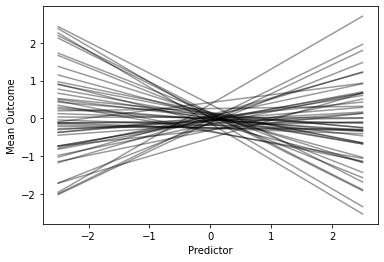

In [37]:
plot_predictive(prior_check, 'a', 'bW')

In [38]:
import arviz as az

In [39]:
def plot_linear_hdi(a_samples, b_samples, sigma_samples, x_seq):
    obs_samples = []
    for i in range(len(a_samples)):
        mu_sample = a_samples[i] + b_samples[i]*x_seq
        sigma_sample = sigma_samples[i]
        obs_samples.append(np.random.normal(mu_sample, sigma_sample))
    obs_samples = np.array(obs_samples)
    
    # The distribution over observed samples
    az.plot_hdi(x_seq, obs_samples, hdi_prob=0.97)
    
    # The MAP estimate of the relationship
    plt.plot(x_seq, a_samples.mean() + b_samples.mean()*x_seq, color='black')
    
    mu_pred = np.array([a_samples + b_samples*x for x in x_seq]).T
    # The distribution of the mean of mu.
    az.plot_hdi(x_seq, mu_pred, hdi_prob=0.97, color='blue')
    


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


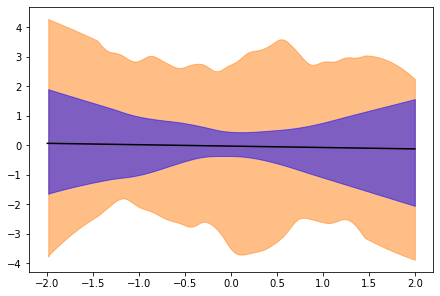

In [40]:
plot_linear_hdi(prior_check['a'], prior_check['bW'], prior_check['sigma'], np.linspace(-2, 2, num=30)) 

In [41]:
with m:
    trace = pm.sample(1000, tune=1000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bW, bS, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


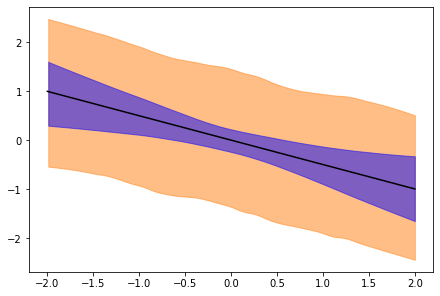

In [42]:
# There is a negative relationship between weight and bouldering grade when we control for finger strength.
plot_linear_hdi(trace['a'], trace['bW'], trace['sigma'], np.linspace(-2, 2, num=30))

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


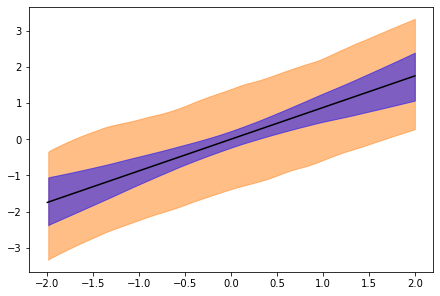

In [43]:
# There is a strong positive correlation between finger strength and bouldering grade
plot_linear_hdi(trace['a'], trace['bS'], trace['sigma'], np.linspace(-2, 2, num=30))

In [44]:
with pm.Model() as m:
    a = pm.Normal('a', 0, 0.2)
    bS = pm.Normal('bS', 0, 0.5)
    bW = pm.Normal('bW', 0, 0.5)
    sigma = pm.Exponential('sigma', 1)
    mu = a + bW * weight_std
    grade = pm.Normal('grade', mu, sigma, observed=bouldering_std)

In [45]:
with m:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bW, bS, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


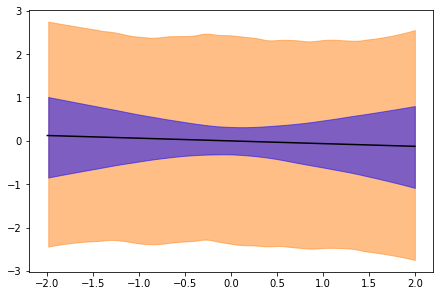

In [46]:
# But when we don't control for finger strength the relationship between weight and bouldering grade is very subtle.
plot_linear_hdi(trace['a'], trace['bW'], trace['sigma'], np.linspace(-2, 2, num=30)) 

In [47]:
with pm.Model() as m:
    a = pm.Normal('a', 0, 0.2)
    bS = pm.Normal('bS', 0, 0.5)
    bW = pm.Normal('bW', 0, 0.5)
    sigma = pm.Exponential('sigma', 1)
    mu = a + bS * hand_l_std
    grade = pm.Normal('grade', mu, sigma, observed=bouldering_std)

In [48]:
with m:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bW, bS, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


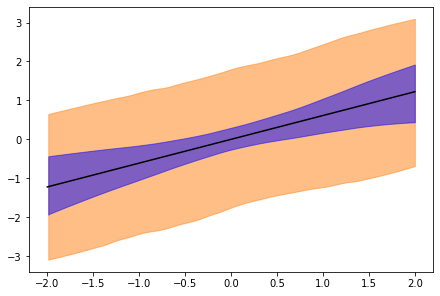

In [49]:
plot_linear_hdi(trace['a'], trace['bS'], trace['sigma'], np.linspace(-2, 2, num=30)) 

### 5M3

A high divorce rate might cause a higher marriage rate because one you divorce you're in a pool of people who can marry again. People are perhaps not so likely to divorce and stay single forever. They probably divorce and remarry. Thus higher divorce rates might cause marriage in that sense.

Predict marriage rate using both divorce rate and age of marriage as predictors. If divorce rate coefficient is high, then it suggests divorces have a role in marriages even when controlling for age of marriage.

### 5M4



In [50]:
import pandas as pd
lds_df = pd.read_csv('data/lds.tsv', sep='\t')#.set_index('Rank')
divorce_df = pd.read_csv('data/WaffleDivorce.csv', sep=';').rename(columns={'Location':'State'})

In [51]:
df = divorce_df[['State', 'MedianAgeMarriage', 'Marriage', 'Divorce']].merge(lds_df[['State', 'Percentage of Mormon Residents']], on='State')

In [52]:
df['lds'] = df['Percentage of Mormon Residents'].apply(lambda x: float(x[:-1]))

In [53]:
def standardize(col):
    return (col - col.mean()) / col.std()

In [54]:
df['L_std'] = standardize(df['lds'])
df['M_std'] = standardize(df['Marriage'])
df['A_std'] = standardize(df['MedianAgeMarriage'])
df['D_std'] = standardize(df['Divorce'])

In [57]:
with pm.Model() as m:
    a = pm.Normal('a', 0, 0.2)
    bM = pm.Normal('bM', 0, 1)
    bA = pm.Normal('bA', 0, 1)
    bL = pm.Normal('bL', 0, 1)
    sigma = pm.Exponential('sigma', 1)
    mu = a + bM*df['M_std'] + bA*df['A_std'] + bL*df['L_std']
    grade = pm.Normal('grade', mu, sigma, observed=df['D_std'])

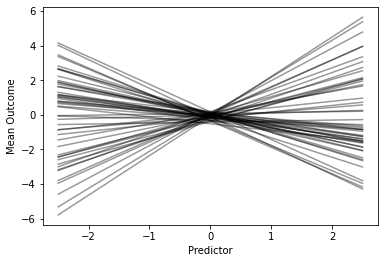

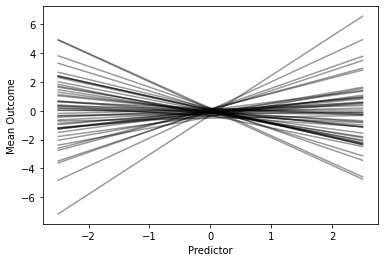

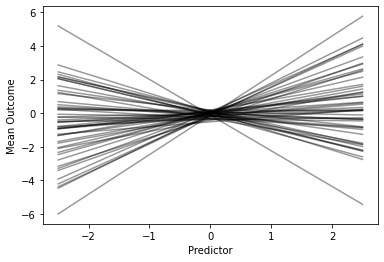

In [63]:
with m:
    prior_check = pm.sample_prior_predictive(samples=50)
plot_predictive(prior_check, 'a', 'bM')
plot_predictive(prior_check, 'a', 'bA')
plot_predictive(prior_check, 'a', 'bL')

In [64]:
with m:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bL, bA, bM, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


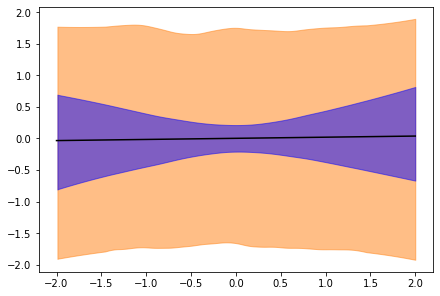

In [67]:
plot_linear_hdi(trace['a'], trace['bM'], trace['sigma'], np.linspace(-2, 2, num=30))

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


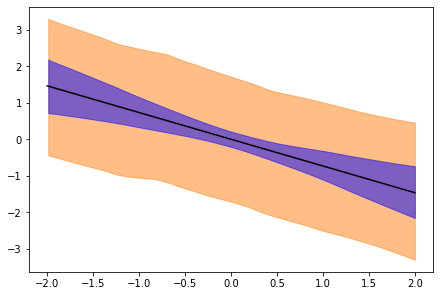

In [68]:
plot_linear_hdi(trace['a'], trace['bA'], trace['sigma'], np.linspace(-2, 2, num=30)) 

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


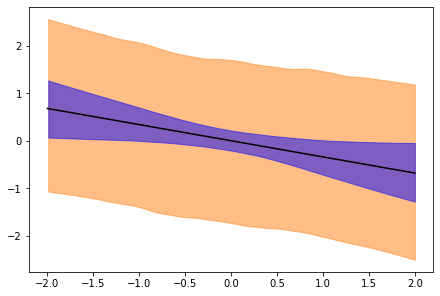

In [69]:
plot_linear_hdi(trace['a'], trace['bL'], trace['sigma'], np.linspace(-2, 2, num=30)) 

So we see that Marriage rate is not a predictor of divorce rate when you control for median age at marriage and the proportion of LDS. The LDS proportion and median age at marriage are quite predictive.

### 5M5

The two mechanisms:
    - Price of petrol means less driving and more exercise
    - Price of petrol means less eating out and thus less food consumed.
    
We want to examine the role of each of these mechanisms. Multiple regression could do this by including two other predictor variables: Frequency of eating out and amount of exercise. Ideally the exercise predictor would be specifically the number of ours spent exercising specifically in the form of walking or riding a bike to commute, since you could still drive a lot and exercise a lot. Also, it would be good to actually have as a predictor the amount of driving that occurs. Both of the mechanisms above are predicated on the assumption that price of petrol actually decreases the amount of driving. But if that isn't the case, then we'd need to generate some other hypotheses.

### 5H1

The implied conditional independency is just $M \perp D | A$. To test if the data are consistent with it, we would create a multiple regression model predicting D and using M and A as our predictor, can also create one without A as a predictor. If the conditional independency is true, then there will be no relationship between M and D once you control for A, but otherwise there will be.

In [70]:
with pm.Model() as m:
    a = pm.Normal('a', 0, 0.2)
    bM = pm.Normal('bM', 0, 1)
    bA = pm.Normal('bA', 0, 1)
    sigma = pm.Exponential('sigma', 1)
    mu = a + bM*df['M_std'] + bA*df['A_std']
    grade = pm.Normal('grade', mu, sigma, observed=df['D_std'])

In [71]:
with m:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bL, bA, bM, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


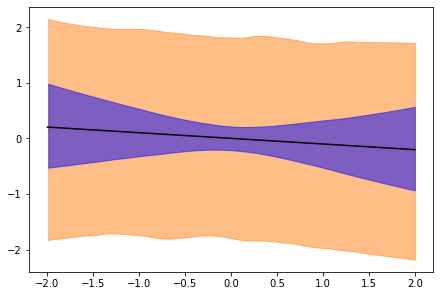

In [72]:
plot_linear_hdi(trace['a'], trace['bM'], trace['sigma'], np.linspace(-2, 2, num=30))

So we see that there is a slight negative association between marriage and divorce rates when you control for A. So they're perhaps not quite conditionally independent, but we can also conclude that marriage in and of itself doesn't cause divorce. How about when you don't include A as a predictor?

In [73]:
with pm.Model() as m:
    a = pm.Normal('a', 0, 0.2)
    bM = pm.Normal('bM', 0, 1)
    sigma = pm.Exponential('sigma', 1)
    mu = a + bM*df['M_std']
    grade = pm.Normal('grade', mu, sigma, observed=df['D_std'])

In [74]:
with m:
    trace = pm.sample(1000, tune=1000)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bM, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


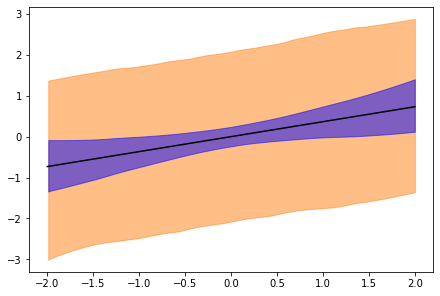

In [75]:
plot_linear_hdi(trace['a'], trace['bM'], trace['sigma'], np.linspace(-2, 2, num=30))

Strictly speaking, we didn't need to do this second regression to test the conditional independence claim, but if the real question was to see how A affects the relationship, then this tells us that.

### 3H2

Counterfactual plot to see the effect of halving a state's marriage rate. First we will do the counterfactual prediction in terms of standardized variables. Then we will find out what halving the marriage rate means in terms of the standardized variables and thus get the answer to our problem.

In [78]:
#We want to regress M on and A and A on D
from theano import shared

In [100]:
marriage_shared = shared(df['M_std'].values)

In [101]:
marriage_shared

<TensorType(float64, vector)>

In [102]:
with pm.Model() as m:
    sigmaA = pm.Exponential('sigmaA', 1)
    bMA = pm.Normal('bMA', 0, 0.5)
    aA = pm.Normal('aA', 0, 0.2)
    muA = aA + bMA*marriage_shared
    age = pm.Normal('age', muA, sigmaA, observed=df['A_std'])
    
    #sigmaD = pm.Exponential('sigmaD', 1)
    #bAD = pm.Normal('bAD', 0, 0.5)
    #aD = pm.Normal('aD', 0, 0.2)
    #muD = a + bMA*df['A_std']
    #divorce = pm.Normal('divorce', muD, sigmaD, observed=df['D_std'])
    
    trace = pm.sample()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [aA, bMA, sigmaA]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


In [103]:
az.summary(trace)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bMA,-0.691,0.103,-0.877,-0.494,0.001,0.001,5432.0,2847.0,1.0
aA,0.001,0.091,-0.170,0.173,0.001,0.001,5591.0,3065.0,1.0
sigmaA,0.713,0.075,0.583,0.852,0.001,0.001,5445.0,2973.0,1.0


In [105]:
df.columns

Index(['State', 'MedianAgeMarriage', 'Marriage', 'Divorce',
       'Percentage of Mormon Residents', 'lds', 'L_std', 'M_std', 'A_std',
       'D_std'],
      dtype='object')

In [107]:
df['Marriage'].mean()

20.114000000000004

In [110]:
half_mean_marriage = df['Marriage'].mean() / 2

In [112]:
half_mean_marriage_std = (half_mean_marriage - df['Marriage'].mean()) / df['Marriage'].std()

In [113]:
half_mean_marriage_std

-2.648038547766006

In [119]:
M_seq = np.linspace(-2.6481, 2.75)

In [121]:
marriage_shared.set_value(M_seq)

In [123]:
with m:
    age_preds = pm.sample_posterior_predictive(trace)

In [125]:
age_preds['age'].shape

(4000, 50)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


Text(0.5, 0, 'M')

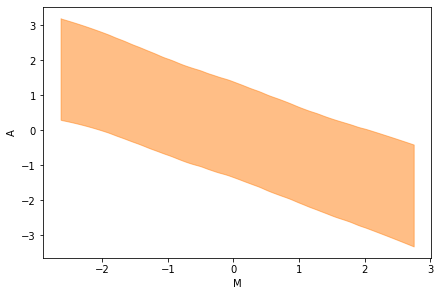

In [132]:
az.plot_hdi(M_seq, age_preds["age"])
plt.ylabel('A')
plt.xlabel('M')

In [137]:
age_preds['age'].mean(axis=0)

array([ 1.82258725,  1.74722879,  1.69594008,  1.59595079,  1.53130463,
        1.44288663,  1.3788489 ,  1.28841831,  1.19600307,  1.16037222,
        1.0567193 ,  0.99219142,  0.92500769,  0.83476246,  0.7901532 ,
        0.68934497,  0.61405479,  0.51618051,  0.4541858 ,  0.39844071,
        0.32462541,  0.22467922,  0.14721737,  0.06654621,  0.02264443,
       -0.06489612, -0.14521053, -0.2261938 , -0.28482633, -0.36421791,
       -0.4595846 , -0.53383907, -0.61651814, -0.67276719, -0.75118787,
       -0.81289754, -0.90523969, -0.97735656, -1.07687552, -1.14962839,
       -1.23666578, -1.27954765, -1.37911201, -1.43973569, -1.5180104 ,
       -1.61901208, -1.67322697, -1.75171885, -1.8183646 , -1.91819972])

In [139]:
# The first mean will correspond to the counterfactual age if we set the mean marriage rate to half of the current one.
age = age_preds['age'].mean(axis=0)[0]

In [142]:
# What age does that std correspond to?
age * df['MedianAgeMarriage'].std() + df['MedianAgeMarriage'].mean()

28.32062472736527

In [141]:
df.columns

Index(['State', 'MedianAgeMarriage', 'Marriage', 'Divorce',
       'Percentage of Mormon Residents', 'lds', 'L_std', 'M_std', 'A_std',
       'D_std'],
      dtype='object')

In [143]:
df['MedianAgeMarriage'].mean()

26.053999999999995

In [145]:
# Now we'll learn how median age at marriage indicates divorce rate, before substituting in the age we would have if the marriage rate were halved.

In [146]:
age_shared = shared(df['A_std'].values)

In [147]:
with pm.Model() as m:
    
    sigmaD = pm.Exponential('sigmaD', 1)
    bAD = pm.Normal('bAD', 0, 0.5)
    aD = pm.Normal('aD', 0, 0.2)
    muD = aD + bAD*age_shared
    divorce = pm.Normal('divorce', muD, sigmaD, observed=df['D_std'])
    
    trace = pm.sample()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [aD, bAD, sigmaD]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


In [149]:
az.summary(trace)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bAD,-0.566,0.118,-0.800,-0.365,0.002,0.001,5342.0,2987.0,1.0
aD,0.000,0.102,-0.193,0.191,0.002,0.002,4472.0,2696.0,1.0
sigmaD,0.823,0.086,0.668,0.986,0.001,0.001,4726.0,2714.0,1.0


In [150]:
age_shared.set_value(np.array([age]))

In [151]:
with m:
    divorce_preds = pm.sample_posterior_predictive(trace)

In [154]:
divorce_preds['divorce']

(4000, 50)

In [155]:
age_shared

<TensorType(float64, vector)>

In [159]:
divorce_preds['divorce'].mean()

-1.034228285082771

In [161]:
divorce_preds['divorce'].mean() * df['Divorce'].std() + df['Divorce'].mean()

7.80486276079621

^ This is what the divorce rate would be if we halved the marriage rate. Compare this to the mean divorce rate:

In [163]:
df['Divorce'].mean()

9.688

### 5H3

In [12]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('data/milk.csv', sep=';')

In [14]:
df['K'] = (df['kcal.per.g'] - df['kcal.per.g'].mean()) / df['kcal.per.g'].std()
df['N'] = (df['neocortex.perc'] - df['neocortex.perc'].mean()) / df['neocortex.perc'].std()
df['M'] = (np.log(df['mass']) - np.log(df['mass']).mean()) / np.log(df['mass']).std()

In [18]:
# Drop NaN values
df = df.dropna()

In [19]:
df

,clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc,K,N,M
0,Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16,-0.940041,-2.080196,-0.455836
5,New World Monkey,Alouatta seniculus,0.47,21.22,23.58,55.20,5.25,64.54,-1.063955,-0.508641,0.127441
6,New World Monkey,A palliata,0.56,29.66,23.46,46.88,5.37,64.54,-0.506340,-0.508641,0.140751
7,New World Monkey,Cebus apella,0.89,53.41,15.80,30.79,2.51,67.64,1.538249,0.010742,-0.307158
9,New World Monkey,S sciureus,0.92,50.58,22.33,27.09,0.68,68.85,1.724120,0.213470,-1.076270
10,New World Monkey,Cebuella pygmaea,0.80,41.35,20.85,37.80,0.12,58.85,0.980633,-1.461962,-2.097830
11,New World Monkey,Callimico goeldii,0.46,3.93,25.30,70.77,0.47,61.69,-1.125913,-0.986139,-1.293797
12,New World Monkey,Callithrix jacchus,0.71,38.38,20.09,41.53,0.32,60.32,0.423018,-1.215673,-1.520189
15,Old World Monkey,Miopithecus talpoin,0.68,40.15,18.08,41.77,1.55,69.97,0.237147,0.401118,-0.591039
17,Old World Monkey,M mulatta,0.97,55.51,13.17,31.32,3.24,70.41,2.033906,0.474837,-0.156810


In [121]:
import arviz as az
import pymc3 as pm
from theano import shared

In [122]:
mass_shared = shared(df['M'].values)
neocortex_shared = shared(df['N'].values)

In [123]:
with pm.Model() as m:
 
    # M -> N
    sigmaN = pm.Exponential('sigmaN', 1)
    aN = pm.Normal('aM', 0, 0.2)
    bMN = pm.Normal('bMN', 0, 0.5)
    muN = aN + bMN*mass_shared
    neocortex = pm.Normal('neocortex', muN, sigmaN, observed=df['N'])
    
    # M -> K <- N
    sigmaK = pm.Exponential('sigmaK', 1)
    aK = pm.Normal('aK', 0, 0.2)
    bNK = pm.Normal('bNK', 0, 0.5)
    bMK = pm.Normal('bMK', 0, 0.5)
    muK = aK + bNK*neocortex_shared + bMK*mass_shared
    kcal = pm.Normal('kcal', muK, sigmaK, observed=df['K'])

    
    trace = pm.sample()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [bMK, bNK, aK, sigmaK, bMN, aM, sigmaN]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


In [124]:
az.summary(trace)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
aM,-0.013,0.131,-0.263,0.223,0.002,0.002,4112.0,2552.0,1.0
bMN,0.603,0.151,0.323,0.888,0.003,0.002,3678.0,2550.0,1.0
aK,0.057,0.148,-0.231,0.327,0.002,0.002,4057.0,2895.0,1.0
bNK,0.602,0.286,0.106,1.157,0.005,0.004,3006.0,2921.0,1.0
bMK,-0.643,0.252,-1.108,-0.165,0.005,0.004,2510.0,2712.0,1.0
sigmaN,0.714,0.137,0.501,0.985,0.002,0.002,3617.0,2770.0,1.0
sigmaK,0.871,0.180,0.571,1.212,0.003,0.002,2993.0,2382.0,1.0


In [125]:
mass_linspace = np.linspace(df['mass'].min(), df['mass'].max(), 17)

In [126]:
mass_log_linspace = np.log(mass_linspace)
mass_shared.set_value(mass_log_linspace)

In [127]:
#mass_counterfactual = np.linspace(-2, 2, 17)
#mass_shared.set_value(mass_counterfactual)

In [128]:
with m:
    m_neocortex = pm.sample_posterior_predictive(trace)

In [129]:
import matplotlib.pyplot as plt

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


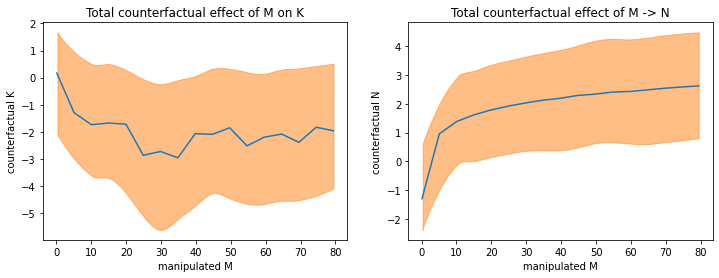

In [130]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))
az.plot_hdi(mass_linspace, m_neocortex["kcal"], ax=ax[0])
ax[0].plot(mass_linspace, m_neocortex["kcal"].mean(0))
ax[0].set_title("Total counterfactual effect of M on K")
ax[0].set_xlabel("manipulated M")
ax[0].set_ylabel("counterfactual K")


az.plot_hdi(mass_linspace, m_neocortex["neocortex"], ax=ax[1])
ax[1].plot(mass_linspace, m_neocortex["neocortex"].mean(0))
ax[1].set_title("Total counterfactual effect of M -> N")
ax[1].set_xlabel("manipulated M")
ax[1].set_ylabel("counterfactual N");

In [132]:
# There's a non-linear relationship, but the above left plot shows how changing the mass affects the kcal per gram of milk.

In [133]:
# Is this really using the simulated effect on N in the prediction of K though? We can get an answer to this by using two separate models

In [134]:
mass_shared = shared(df['M'].values)
neocortex_shared = shared(df['N'].values)

In [136]:
with pm.Model() as m_MN:
    # M -> N
    sigmaN = pm.Exponential('sigmaN', 1)
    aN = pm.Normal('aM', 0, 0.2)
    bMN = pm.Normal('bMN', 0, 0.5)
    muN = aN + bMN*mass_shared
    neocortex = pm.Normal('neocortex', muN, sigmaN, observed=df['N'])
    
    trace_MN = pm.sample()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [bMN, aM, sigmaN]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


In [137]:
with pm.Model() as m_MNK:
    # M -> K <- N
    sigmaK = pm.Exponential('sigmaK', 1)
    aK = pm.Normal('aK', 0, 0.2)
    bNK = pm.Normal('bNK', 0, 0.5)
    bMK = pm.Normal('bMK', 0, 0.5)
    muK = aK + bNK*neocortex_shared + bMK*mass_shared
    kcal = pm.Normal('kcal', muK, sigmaK, observed=df['K'])
    
    trace_MNK = pm.sample()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # Remove the CWD from sys.path while we load stuff.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [bMK, bNK, aK, sigmaK]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


In [138]:
mass_linspace = np.linspace(df['mass'].min(), df['mass'].max(), 17)
mass_log_linspace = np.log(mass_linspace)
mass_shared.set_value(mass_log_linspace)

In [140]:
with m_MN:
    ppc_MN = pm.sample_posterior_predictive(trace_MN)

In [142]:
ppc_MN['neocortex'].shape

(4000, 17)

In [144]:
neocortex_shared.set_value(ppc_MN['neocortex'].mean(axis=0))

In [145]:
with m_MNK:
    ppc_MNK = pm.sample_posterior_predictive(trace_MNK)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


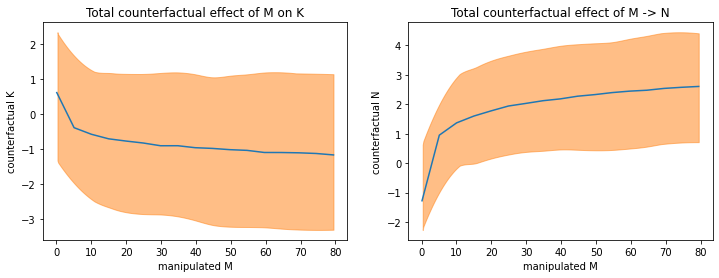

In [149]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))
az.plot_hdi(mass_linspace, ppc_MNK["kcal"], ax=ax[0])
ax[0].plot(mass_linspace, ppc_MNK["kcal"].mean(0))
ax[0].set_title("Total counterfactual effect of M on K")
ax[0].set_xlabel("manipulated M")
ax[0].set_ylabel("counterfactual K")


az.plot_hdi(mass_linspace, ppc_MN["neocortex"], ax=ax[1])
ax[1].plot(mass_linspace, ppc_MN["neocortex"].mean(0))
ax[1].set_title("Total counterfactual effect of M -> N")
ax[1].set_xlabel("manipulated M")
ax[1].set_ylabel("counterfactual N");

In [152]:
# Yeah, so there's a difference. the pymc-devs code for chapter 5 might be incorrect.

### 3H4

Before we bring in Southernness, let's first acknowledge that once Age was controlled for, the relationship between M and D became very mild, possibly non-existent. So it might simply be the case that the DAG is D <- A -> M, without an edge M -> D. Regardless of whether we take or leave that edge, the effect of S on D is probably mediated through age of marriage. The implication of this will be that once we control for Age, the relationship between S and D will disappear.

So what we will do next is first regress S on D to see the correlation. Then we will do multiple regression of S and M on D. If the coefficient for S disappears in the latter model, then that will indicate that the hypothesis that there is an edge from S to A only will have some support.

In [169]:
import pandas as pd
divorce_df = pd.read_csv('data/WaffleDivorce.csv', sep=';').rename(columns={'Location':'State'})
df = divorce_df

In [170]:
df['M_std'] = standardize(df['Marriage'])
df['A_std'] = standardize(df['MedianAgeMarriage'])
df['D_std'] = standardize(df['Divorce'])

In [172]:
df.head()

,State,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860,M_std,A_std,D_std
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45,0.022644,-0.606290,1.654205
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00,1.549802,-0.686699,1.544364
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00,0.048974,-0.204241,0.610716
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26,1.655123,-1.410387,2.093569
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00,-0.266989,0.599857,-0.927058


In [193]:
# First regress S on D
with pm.Model() as m:
    sigma = pm.Exponential('sigma', 1)
    bS = pm.Normal('bS', 0, 0.5, shape=2)
    mu = bS[df['South']]
    divorce = pm.Normal('divorce', mu, sigma, observed=df['D_std'])

In [196]:
with m:
    prior_check = pm.sample_prior_predictive()

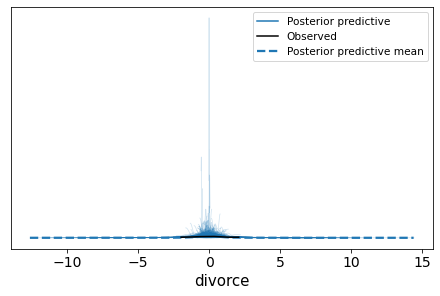

In [200]:
az.plot_ppc(az.from_pymc3(posterior_predictive=prior_check, model=m));

In [201]:
with m:
    trace = pm.sample()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [bS, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'bS'}>,
        <AxesSubplot:title={'center':'bS'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

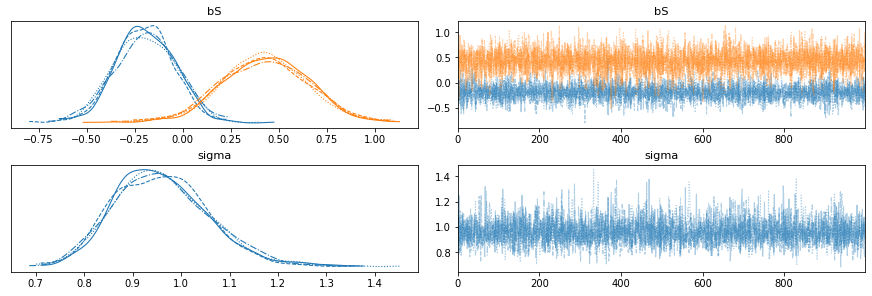

In [203]:
az.plot_trace(trace)

In [206]:
az.summary(trace)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bS[0],-0.194,0.156,-0.470,0.104,0.002,0.002,5073.0,2654.0,1.0
bS[1],0.428,0.228,0.018,0.864,0.003,0.002,4891.0,2867.0,1.0
sigma,0.961,0.099,0.791,1.150,0.001,0.001,4775.0,2682.0,1.0


So there's clearly a difference between the groups. Southernness is strongly associated with divorce rates. Now let's see what happens when we control for age of marriage.

#### Q: Do we want to have a separate slope that depends on the southernness?

In [215]:
with pm.Model() as m:
    sigma = pm.Exponential('sigma', 1)
    bA = pm.Normal('bA', 0, 0.5, shape=2)
    a = pm.Normal('a', 0, 0.2, shape=2)
    mu = a[df['South']] + bA[df['South']]*df['A_std']
    divorce = pm.Normal('divorce', mu, sigma, observed=df['D_std'])

In [216]:
with m:
    prior_check = pm.sample_prior_predictive()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


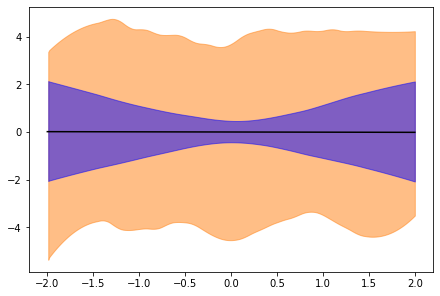

In [221]:
plot_linear_hdi(prior_check['a'][:, 0], prior_check['bA'][:, 0], prior_check['sigma'], np.linspace(-2, 2, num=30))

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


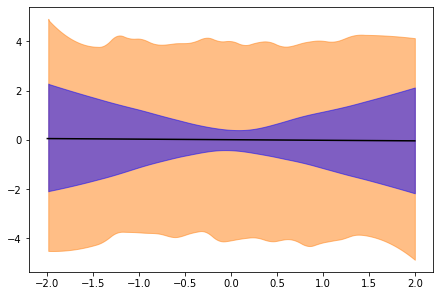

In [222]:
plot_linear_hdi(prior_check['a'][:, 1], prior_check['bA'][:, 1], prior_check['sigma'], np.linspace(-2, 2, num=30))

In [223]:
with m:
    trace = pm.sample()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bA, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


In [224]:
az.summary(trace)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bA[0],-0.456,0.117,-0.661,-0.217,0.002,0.001,5250.0,3263.0,1.0
bA[1],-0.911,0.296,-1.452,-0.347,0.005,0.003,4315.0,3570.0,1.0
a[0],-0.102,0.111,-0.302,0.121,0.002,0.001,5121.0,3140.0,1.0
a[1],0.089,0.155,-0.197,0.373,0.002,0.002,4232.0,3403.0,1.0
sigma,0.781,0.083,0.647,0.949,0.001,0.001,4606.0,2848.0,1.0


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'bA'}>,
        <AxesSubplot:title={'center':'bA'}>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

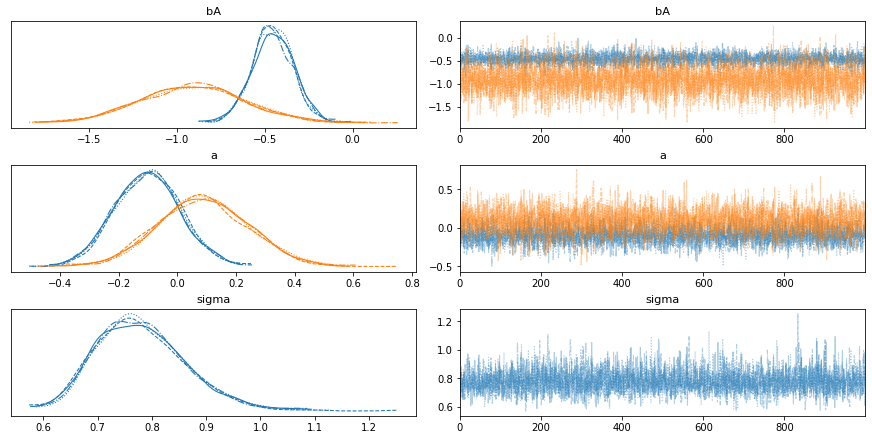

In [225]:
az.plot_trace(trace)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


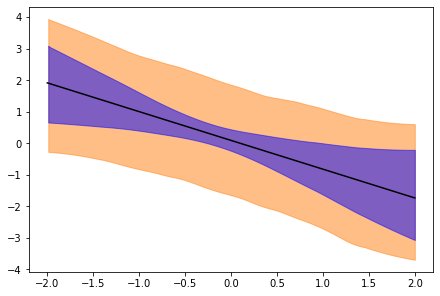

In [226]:
plot_linear_hdi(trace['a'][:, 1], trace['bA'][:, 1], trace['sigma'], np.linspace(-2, 2, num=30))

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


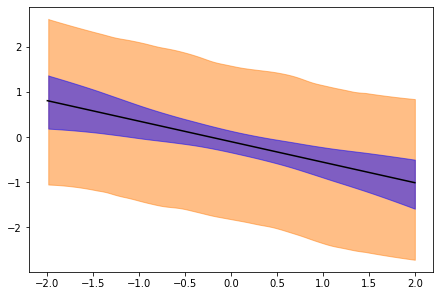

In [227]:
plot_linear_hdi(trace['a'][:, 0], trace['bA'][:, 0], trace['sigma'], np.linspace(-2, 2, num=30))

This seems to be a case where an indicator variable is acutally useful instead of an index variable, because it will directly tell us how much teh southernness changes the mean.

In [238]:
with pm.Model() as m:
    sigma = pm.Exponential('sigma', 1)
    bS = pm.Normal('bS', 0, 0.5)
    a = pm.Normal('a', 0, 0.2)
    mu = a + bS*df['South']
    divorce = pm.Normal('divorce', mu, sigma, observed=df['D_std'])

In [239]:
with m:
    prior_check = pm.sample_prior_predictive()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


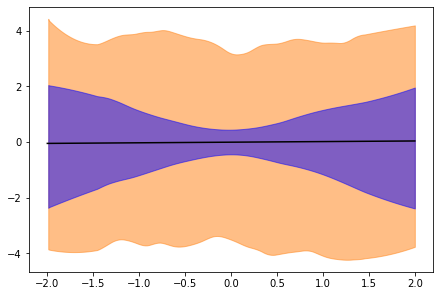

In [240]:
plot_linear_hdi(prior_check['a'], prior_check['bS'], prior_check['sigma'], np.linspace(-2, 2, num=30))

In [241]:
with m:
    trace = pm.sample()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bS, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


In [242]:
az.summary(trace)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bS,0.509,0.254,0.025,0.980,0.005,0.003,2922.0,2530.0,1.0
a,-0.095,0.126,-0.328,0.142,0.002,0.002,3203.0,2465.0,1.0
sigma,0.967,0.102,0.788,1.157,0.002,0.001,4184.0,2653.0,1.0


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'bS'}>,
        <AxesSubplot:title={'center':'bS'}>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

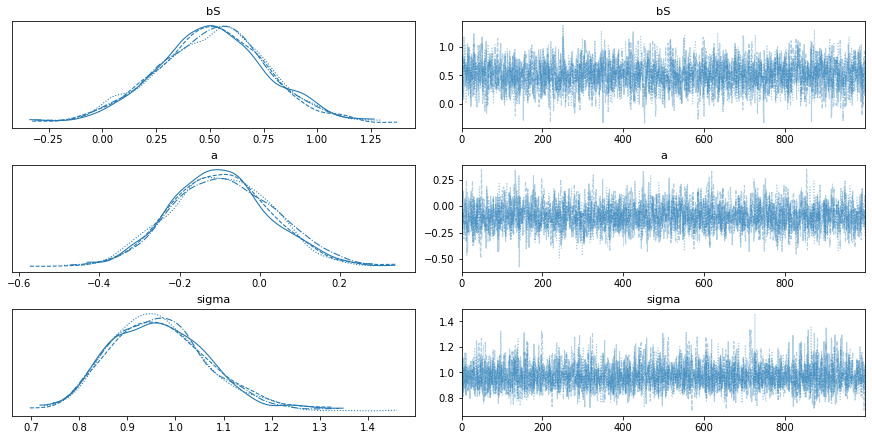

In [243]:
az.plot_trace(trace)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


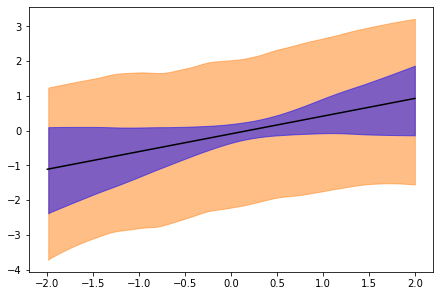

In [244]:
plot_linear_hdi(trace['a'], trace['bS'], trace['sigma'], np.linspace(-2, 2, num=30))

So southerness clearly is associated with higher divorce rates. Now let's control for Age.

In [245]:
with pm.Model() as m:
    sigma = pm.Exponential('sigma', 1)
    bS = pm.Normal('bS', 0, 0.5)
    bA = pm.Normal('bA', 0, 0.5)
    a = pm.Normal('a', 0, 0.2)
    mu = a + bS*df['South'] + bA*df['A_std']
    divorce = pm.Normal('divorce', mu, sigma, observed=df['D_std'])

In [246]:
with m:
    prior_check = pm.sample_prior_predictive()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


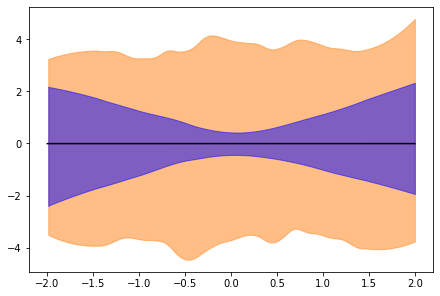

In [248]:
plot_linear_hdi(prior_check['a'], prior_check['bA'], prior_check['sigma'], np.linspace(-2, 2, num=30))

In [249]:
with m:
    trace = pm.sample()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bA, bS, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


In [250]:
az.summary(trace)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bS,0.348,0.224,-0.068,0.776,0.004,0.003,2644.0,2874.0,1.0
bA,-0.528,0.114,-0.734,-0.311,0.002,0.001,3974.0,2630.0,1.0
a,-0.076,0.110,-0.282,0.132,0.002,0.002,3055.0,2978.0,1.0
sigma,0.804,0.085,0.663,0.973,0.001,0.001,4491.0,2756.0,1.0


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'bS'}>,
        <AxesSubplot:title={'center':'bS'}>],
       [<AxesSubplot:title={'center':'bA'}>,
        <AxesSubplot:title={'center':'bA'}>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

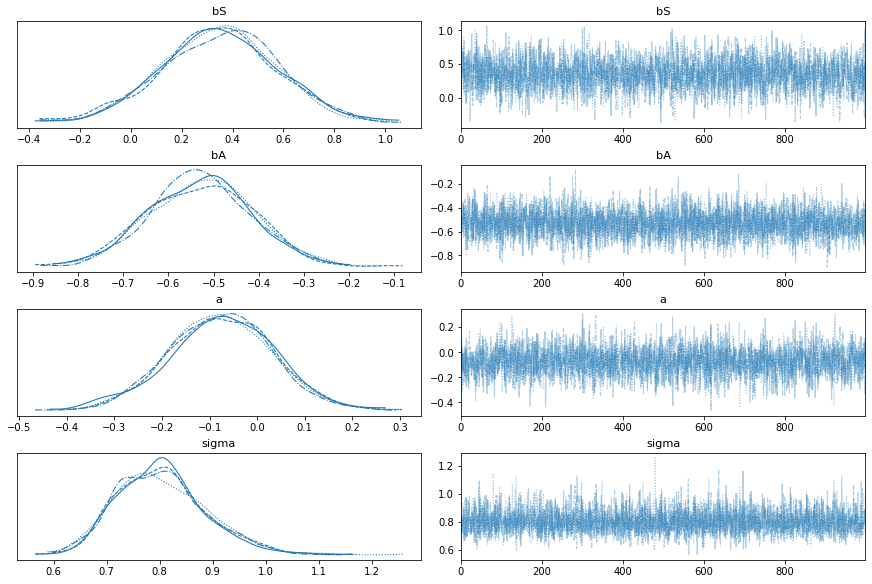

In [251]:
az.plot_trace(trace)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


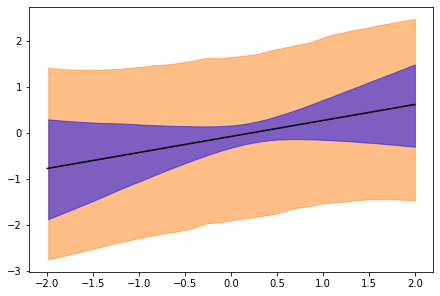

In [252]:
plot_linear_hdi(trace['a'], trace['bS'], trace['sigma'], np.linspace(-2, 2, num=30))

Southernness is still quite associated with divorce rates, even when controlling for age of marriages. So there's something else at play! We'll do one more regression, where we control for marriage rate just to be sure.

In [253]:
with pm.Model() as m:
    sigma = pm.Exponential('sigma', 1)
    bS = pm.Normal('bS', 0, 0.5)
    bA = pm.Normal('bA', 0, 0.5)
    bM = pm.Normal('bM', 0, 0.5)
    a = pm.Normal('a', 0, 0.2)
    mu = a + bS*df['South'] + bA*df['A_std'] + bM*df['M_std']
    divorce = pm.Normal('divorce', mu, sigma, observed=df['D_std'])

In [254]:
with m:
    trace = pm.sample()

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bM, bA, bS, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'bS'}>,
        <AxesSubplot:title={'center':'bS'}>],
       [<AxesSubplot:title={'center':'bA'}>,
        <AxesSubplot:title={'center':'bA'}>],
       [<AxesSubplot:title={'center':'bM'}>,
        <AxesSubplot:title={'center':'bM'}>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

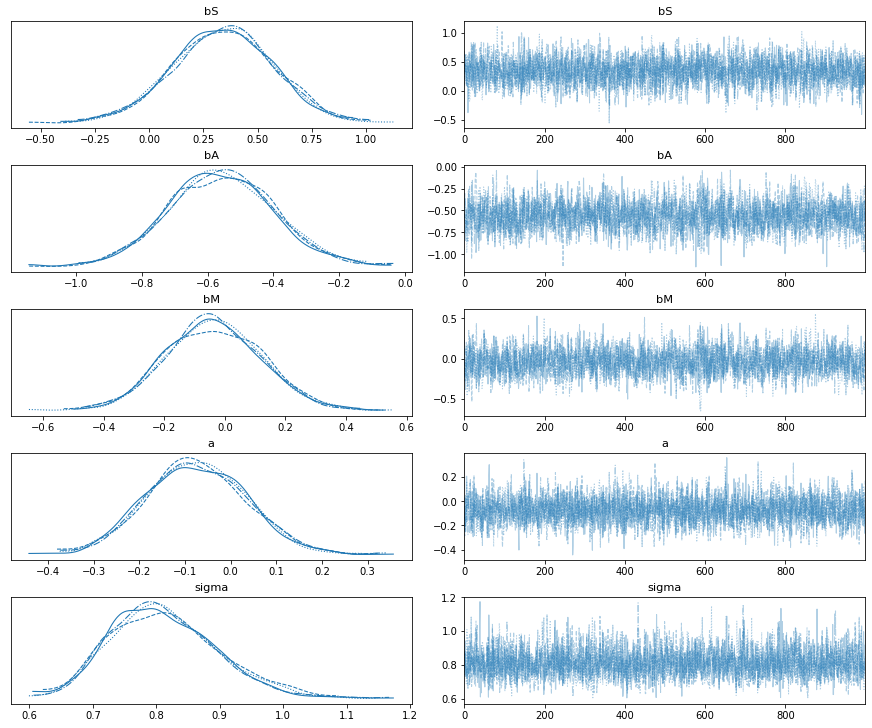

In [255]:
az.plot_trace(trace)

In [256]:
az.summary(trace)

/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bS,0.339,0.227,-0.085,0.761,0.004,0.003,3003.0,3130.0,1.0
bA,-0.557,0.160,-0.881,-0.273,0.003,0.002,2570.0,2331.0,1.0
bM,-0.036,0.159,-0.330,0.258,0.003,0.002,2544.0,2696.0,1.0
a,-0.074,0.109,-0.280,0.125,0.002,0.001,3237.0,3082.0,1.0
sigma,0.813,0.085,0.664,0.973,0.001,0.001,3444.0,3130.0,1.0


/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/Users/oadams/code/oadams.github.io/statistical_rethinking_solutions/venv/lib/python3.7/site-packages/arviz/stats/stats.py:459: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


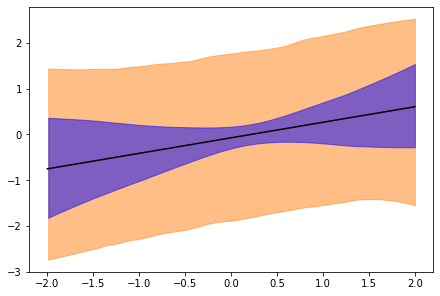

In [257]:
plot_linear_hdi(trace['a'], trace['bS'], trace['sigma'], np.linspace(-2, 2, num=30))

Yeah, it looks like there's another way southernness is associated with divorce rates that is not to do with age of marriages or marriage rate.